In [48]:
#using unsupervied learning model to predit the average rating for #1 restaurant category in USA
#Neural Networks with 1 layer and 1 neuron

import json
import pandas as pd
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")

from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [49]:
#read in dataset
df = pd.read_csv('cleaned_data.csv')
df.head()

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id
0,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA
1,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA
2,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA
3,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg
4,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,19,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA


In [50]:
#Standardize Lat, Log, Stars and Review count columns
columns_to_standardize = ['latitude', 'longitude', 'stars', 'review_count']
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id
0,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA
1,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA
2,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA
3,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg
4,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.22364,-1.422917,-0.589038,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA


In [51]:
#separate American Restaurents with others
df['category'] = df['category'].fillna('')

american_restaurants = df[df['category'].str.contains('American', case=False)]
other_restaurants = df[~df['category'].str.contains('American', case=False)]


In [52]:
#run KMeans model
X = other_restaurants[['latitude', 'longitude', 'stars', 'review_count']]
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

KMeans(n_clusters=30)

In [53]:
labels = kmeans.labels_
labels

array([ 7,  7,  7, ..., 20, 20, 20], dtype=int32)

In [54]:
#View labels
pd.Series(kmeans.labels_).value_counts()

9     99562
16    83117
1     78664
5     60266
11    56635
20    52151
29    51238
19    50540
24    39403
22    38091
8     35855
23    33422
28    33212
21    27908
12    24144
7     23843
2     23464
18    22621
6     19336
27    19274
13    18262
14    16901
4     16142
25    15059
10    14822
0     13704
3     10471
17     6660
15     3584
26     2754
dtype: int64

In [55]:
#Add labels to the dataframe
labeled_df = other_restaurants.copy()
labeled_df['label'] = labels
labeled_df

,business_id,latitude,longitude,stars,review_count,category,review_id,user_id,label
0,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.223640,-1.422917,-0.589038,Greek,QPZ66Xk54CprqZgTW1QTdQ,m6YhwUNoehMm6s52w9A4eA,7
1,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.223640,-1.422917,-0.589038,Greek,JR0MWE4psJqD2MyHbMckxA,WJ-veSDe63t0HnCu2E1NSA,7
2,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.223640,-1.422917,-0.589038,Greek,sDH_jLadW_kMPfzCj2OxXw,KCD6daAp293FoOUoTjT_YA,7
3,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.223640,-1.422917,-0.589038,Greek,JRp0BzCPLdCIEjGwrj7u2g,iPkdNziqnhNukjnmsrSzmg,7
4,k0hlBqXX-Bt0vf1op7Jr1w,0.541786,-0.223640,-1.422917,-0.589038,Greek,puUoLmxrnEoBVeaaBQ9tfg,4hPOa5KDB2zPYAb-ONjUXA,7
...,...,...,...,...,...,...,...,...,...
1646180,WnT9NIzQgLlILjPT0kEcsQ,0.820055,0.904506,1.247005,-0.568134,Mexican,cOh-a-xWgOBP4WHxVp2SOg,oh8jhxBjzl7x9WUh8xHsyA,20
1646181,WnT9NIzQgLlILjPT0kEcsQ,0.820055,0.904506,1.247005,-0.568134,Mexican,qBcwQEQPnLxjkw-xbUIF4Q,6nF5PT1c0dF6EpOgQdF2tw,20
1646182,WnT9NIzQgLlILjPT0kEcsQ,0.820055,0.904506,1.247005,-0.568134,Mexican,G8fbysnUAUmqq1XWTjMQ4Q,1M78_w4J9f5S8xmUVYyxdQ,20
1646183,WnT9NIzQgLlILjPT0kEcsQ,0.820055,0.904506,1.247005,-0.568134,Mexican,JITY01bGbdsiUBznLz9rdg,HI8QwhpeP_ZRY5JZy11VDw,20


In [56]:
#filter top reviewers that rated at least 5 American restaurants
user_reviews_count = american_restaurants.groupby('user_id').size()

users_with_more_than_5_reviews = user_reviews_count[user_reviews_count > 5]

print(users_with_more_than_5_reviews)

user_id
---2PmXbF47D870stH1jqA     8
--8r3pNaZiG1fN8LCHuL_g     7
--KsuCSkGGvDKTbdK9NvIg    15
--Vu3Gux9nPnLcG9yO_HxA     9
--_r6E98SNIrGU7weyNxbw    14
                          ..
zz-2jnao6J1enCmzs7FBoA     6
zz9wGVLClSDHoklHoj2g8w    16
zzBhA0M7NNBMYoWj48h53A    11
zziJLt25YU6dp01sewR-IQ    12
zztkCqqgR6VntYbqio4UTQ     8
Length: 34196, dtype: int64


In [57]:
#get american restaurants id and american restaurant reviewer's id
american_restaurants_ids = american_restaurants['business_id'].unique()
american_restaurants_reviewer_ids = american_restaurants['user_id'].unique()

In [58]:
#create pivot table of each user_id's rating to each label
#pivot_df = labeled_df[labeled_df['user_id'].isin(users_with_more_than_5_reviews.index)].groupby(['user_id', 'label']).mean().reset_index().set_index('user_id').pivot(columns='label', values='stars')
pivot_df = labeled_df[labeled_df['user_id'].isin(users_with_more_than_5_reviews.index)].groupby(['user_id', 'label'])['stars'].mean().unstack()
pivot_df

label,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,NaN,NaN,NaN,NaN,0.357031,0.357031,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--8r3pNaZiG1fN8LCHuL_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.867904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--KsuCSkGGvDKTbdK9NvIg,NaN,NaN,NaN,NaN,NaN,0.357031,NaN,NaN,NaN,NaN,...,NaN,-2.757878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--Vu3Gux9nPnLcG9yO_HxA,NaN,NaN,NaN,NaN,NaN,NaN,1.247005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229892,NaN,NaN
--_r6E98SNIrGU7weyNxbw,NaN,-0.532943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357031,...,1.247005,NaN,NaN,NaN,-1.600912,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,NaN,NaN,NaN,NaN,NaN,NaN,1.247005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.092839,NaN,0.357031,NaN,NaN
zz9wGVLClSDHoklHoj2g8w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.719575,1.247005,NaN,...,NaN,-2.312891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.532943
zzBhA0M7NNBMYoWj48h53A,NaN,-0.532943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357031,...,1.247005,NaN,NaN,0.357031,-1.422917,NaN,NaN,NaN,NaN,NaN


In [59]:
#Add in one more column of average rating of each user of all clusters
pivot_df['AVG'] = pivot_df.mean(axis=1)
pivot_df

label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,AVG
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,NaN,NaN,NaN,NaN,0.357031,0.357031,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.134537
--8r3pNaZiG1fN8LCHuL_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.867904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.867904
--KsuCSkGGvDKTbdK9NvIg,NaN,NaN,NaN,NaN,NaN,0.357031,NaN,NaN,NaN,NaN,...,-2.757878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.384614
--Vu3Gux9nPnLcG9yO_HxA,NaN,NaN,NaN,NaN,NaN,NaN,1.247005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.229892,NaN,NaN,0.017993
--_r6E98SNIrGU7weyNxbw,NaN,-0.532943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357031,...,NaN,NaN,NaN,-1.600912,NaN,NaN,NaN,NaN,NaN,0.143437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,NaN,NaN,NaN,NaN,NaN,NaN,1.247005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-4.092839,NaN,0.357031,NaN,NaN,-0.866683
zz9wGVLClSDHoklHoj2g8w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.719575,1.247005,NaN,...,-2.312891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.532943,-0.592275
zzBhA0M7NNBMYoWj48h53A,NaN,-0.532943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357031,...,NaN,NaN,0.357031,-1.422917,NaN,NaN,NaN,NaN,NaN,0.001041


In [73]:
row_means = pivot_df.mean(axis=1, skipna=True)
pivot_df_filled = pivot_df.apply(lambda row: row.fillna(row_means[row.name]), axis=1)
pivot_df_filled.head()

label,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,AVG
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,0.134537,0.134537,0.134537,0.134537,0.357031,0.357031,0.134537,0.134537,0.134537,0.134537,...,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537
--8r3pNaZiG1fN8LCHuL_g,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,...,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904
--KsuCSkGGvDKTbdK9NvIg,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,0.357031,-0.384614,-0.384614,-0.384614,-0.384614,...,-2.757878,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614
--Vu3Gux9nPnLcG9yO_HxA,0.017993,0.017993,0.017993,0.017993,0.017993,0.017993,1.247005,0.017993,0.017993,0.017993,...,0.017993,0.017993,0.017993,0.017993,0.017993,0.017993,0.229892,0.017993,0.017993,0.017993
--_r6E98SNIrGU7weyNxbw,0.143437,-0.532943,0.143437,0.143437,0.143437,0.143437,0.143437,0.143437,0.143437,0.357031,...,0.143437,0.143437,0.143437,-1.600912,0.143437,0.143437,0.143437,0.143437,0.143437,0.143437


In [76]:
X = pivot_df_filled.drop("AVG", axis=1)
y = pivot_df_filled["AVG"]

In [77]:
X

label,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
user_id,,,,,,,,,,,,,,,,,,,,,
---2PmXbF47D870stH1jqA,0.134537,0.134537,0.134537,0.134537,0.357031,0.357031,0.134537,0.134537,0.134537,0.134537,...,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537,0.134537
--8r3pNaZiG1fN8LCHuL_g,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,...,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904,-1.867904
--KsuCSkGGvDKTbdK9NvIg,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,0.357031,-0.384614,-0.384614,-0.384614,-0.384614,...,-0.384614,-2.757878,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614,-0.384614
--Vu3Gux9nPnLcG9yO_HxA,0.017993,0.017993,0.017993,0.017993,0.017993,0.017993,1.247005,0.017993,0.017993,0.017993,...,0.017993,0.017993,0.017993,0.017993,0.017993,0.017993,0.017993,0.229892,0.017993,0.017993
--_r6E98SNIrGU7weyNxbw,0.143437,-0.532943,0.143437,0.143437,0.143437,0.143437,0.143437,0.143437,0.143437,0.357031,...,1.247005,0.143437,0.143437,0.143437,-1.600912,0.143437,0.143437,0.143437,0.143437,0.143437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz-2jnao6J1enCmzs7FBoA,-0.866683,-0.866683,-0.866683,-0.866683,-0.866683,-0.866683,1.247005,-0.866683,-0.866683,-0.866683,...,-0.866683,-0.866683,-0.866683,-0.866683,-0.866683,-4.092839,-0.866683,0.357031,-0.866683,-0.866683
zz9wGVLClSDHoklHoj2g8w,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-1.719575,1.247005,-0.592275,...,-0.592275,-2.312891,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-0.592275,-0.532943
zzBhA0M7NNBMYoWj48h53A,0.001041,-0.532943,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.357031,...,1.247005,0.001041,0.001041,0.357031,-1.422917,0.001041,0.001041,0.001041,0.001041,0.001041


In [78]:
# fill the row empty values with the average value for the row
# X is [0, 29], y = [avg]

#train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
nn_model = tf.keras.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, input_dim=len(X.columns)))
nn_model.compile(loss="MSE", optimizer="adam", metrics=["mse", "mae"])
fit_model = nn_model.fit(X_train, y_train, epochs=50)


Epoch 1/50
787/787 [==============================] - 2s 2ms/step - loss: 0.0582 - mse: 0.0582 - mae: 0.1556
Epoch 2/50
787/787 [==============================] - 1s 2ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0462
Epoch 3/50
787/787 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0177
Epoch 4/50
787/787 [==============================] - 2s 2ms/step - loss: 3.1367e-04 - mse: 3.1367e-04 - mae: 0.0071
Epoch 5/50
787/787 [==============================] - 2s 2ms/step - loss: 7.9808e-05 - mse: 7.9808e-05 - mae: 0.0034
Epoch 6/50
787/787 [==============================] - 1s 2ms/step - loss: 1.3721e-05 - mse: 1.3721e-05 - mae: 0.0015
Epoch 7/50
787/787 [==============================] - 1s 2ms/step - loss: 1.5553e-06 - mse: 1.5553e-06 - mae: 5.3709e-04
Epoch 8/50
787/787 [==============================] - 1s 2ms/step - loss: 1.1428e-07 - mse: 1.1428e-07 - mae: 1.3933e-04
Epoch 9/50
787/787 [==============================] - 1s 2ms/step - loss: 4.5165

In [79]:
#save the model
nn_model.save("prediction_model.h5")


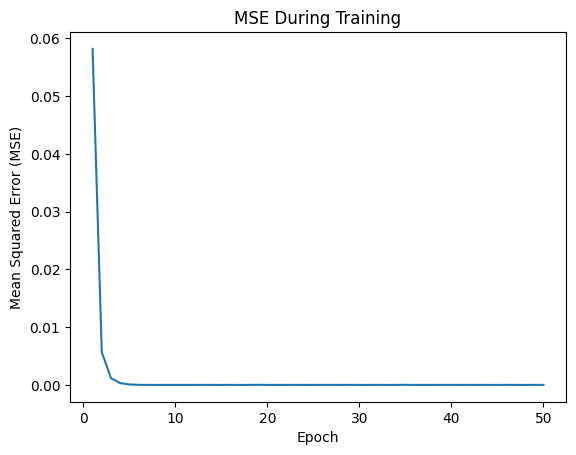

In [80]:
#plot the model
mse_history = fit_model.history['mse']
plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE During Training')
plt.show()

In [81]:
#get r2 score
r2_score(y_test, nn_model.predict(X_test))


263/263 [==============================] - 1s 4ms/step


0.9999999999985039

In [82]:
#get mean absolute error
mean_absolute_error(y_test, nn_model.predict(X_test))


263/263 [==============================] - 1s 3ms/step


4.0288064668515545e-07

In [83]:

loss, mse, mae = nn_model.evaluate(X_test, y_test)


263/263 [==============================] - 1s 2ms/step - loss: 4.0929e-13 - mse: 4.0929e-13 - mae: 4.1385e-07


263/263 [==============================] - 0s 1ms/step


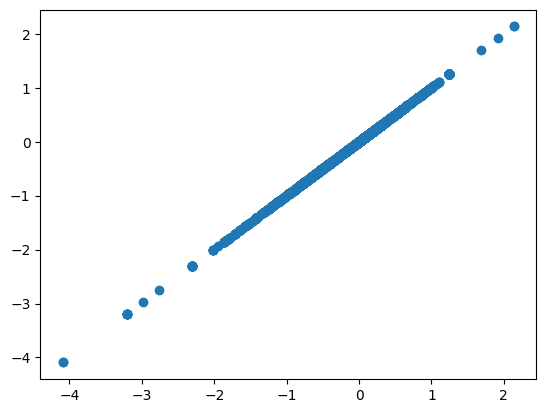

In [84]:
#plot the prediction
plt.scatter(nn_model.predict(X_test), y_test)
